# <p style="background-color:#5d6d7e; font-family:calibri; color:white; padding-top: 30px; padding-bottom: 30px;font-size:100%; text-align:center; border-radius:15px 50px;">Capstone Project | Fraud Detection</p>

![Fraud Detection](\Fraud_Detection-Photo.jpg)

<div style="background-color:#5d6d7e; font-family:calibri; padding: 10px; color:black; font-size:25px; margin-right: 50px;text-align:center; border-radius:15px 50px">

<h3 align="center"><font color=white>Problem:</font></h3><!--3E362E,865D36-->

This project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.

# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:WHITE; font-size:70%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score,roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

import pickle

# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [38]:
df = pd.read_csv(r"D:\Capston_Project\Fraud_Analysis_Dataset.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1
5,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1
6,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1
7,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1
8,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1
9,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1


In [39]:
df.shape

(11142, 10)

<div style="width: 900px; padding: 15px; background-color: #5d6d7e; font-size: 20px; text-align: center; margin: 0 auto; color: black; border-radius: 15px 20px;">

<h2 align="center" style="font-weight:bold;"><font color=black>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __step__ | Time step in the simulation (number of hours) |
| __type__ | Type of transaction: <br> - CASH-IN <br> - CASH_OUT <br> - DEBIT <br> - PAYMENT <br> - TRANSFER |
| __amount__ | Amount of the transaction in local currency |
| __nameOrig__ | Customer ID who initiated the transaction |
| __oldbalanceOrg__ | Initial balance before the transaction for the customer who initiated the transaction |
| __newbalanceOrig__ | New balance after the transaction for the customer who initiated the transaction |
| __nameDest__ | Recipient customer ID of the transaction |
| __oldbalanceDest__ | Initial balance before the transaction for the recipient |
| __newbalanceDest__ | New balance after the transaction for the recipient |
| __isFraud__ | Indicator of whether the transaction was fraudulent (1 = fraud, 0 = non-fraud) |

</div>


# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 3 | Data Overview</p>

In [40]:
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,11142.0,8.717645e+00,1.606748e+01,1.00,2.0000,6.000,7.0000,95.0
amount,11142.0,2.131915e+05,7.600650e+05,2.39,4946.6175,16761.260,154336.5750,10000000.0
oldbalanceOrg,11142.0,9.241173e+05,2.143004e+06,0.00,427.0000,28169.500,304085.4800,19900000.0
newbalanceOrig,11142.0,8.249576e+05,2.089894e+06,0.00,0.0000,4420.605,111412.6350,13000000.0
oldbalanceDest,11142.0,8.883541e+05,2.601376e+06,0.00,0.0000,0.000,271155.4725,33000000.0
newbalanceDest,11142.0,1.103211e+06,2.982447e+06,0.00,0.0000,0.000,318637.3600,34600000.0
isFraud,11142.0,1.024951e-01,3.033119e-01,0.00,0.0000,0.000,0.0000,1.0


In [43]:
df.describe(include='object')

,type,nameOrig,nameDest
count,11142,11142,11142
unique,5,11142,7508
top,PAYMENT,C1305486145,C985934102
freq,5510,1,62


In [44]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 4 | EDA - Exploratory Data Analysis</p>

<h3 style="color:#e5e8e8;">Step 4-1: Check Type in percentage</h3>

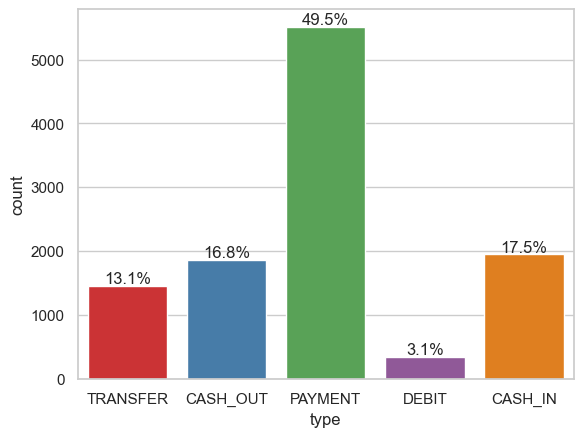

In [45]:
total = len(df)
ax = sns.countplot(x='type', data=df, palette='Set1') 

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<h3 style="color:#e5e8e8;">Step 4-2: Check which is the higher amount in the type</h3>

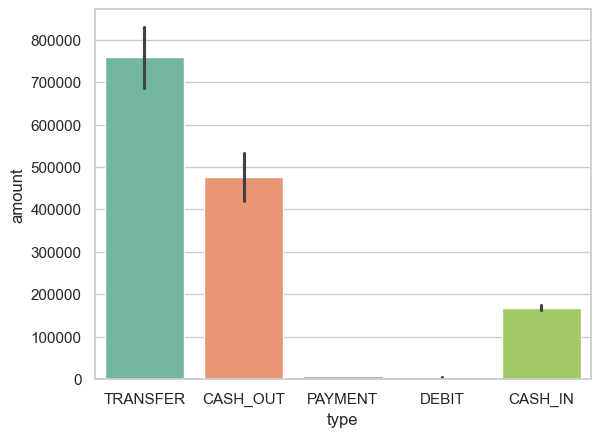

In [46]:
ax = sns.barplot(x='type', y='amount', data=df, palette='Set2')
plt.show()

<h3 style="color:#e5e8e8;">Step 4-3: Check Fraud or Not Fraud Count</h3>

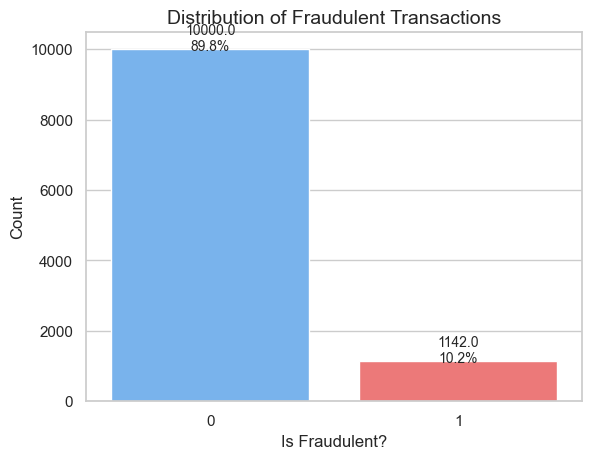

In [47]:
total = len(df)
sns.set(style="whitegrid")
ax = sns.countplot(x='isFraud', data=df, palette=['#66b3ff', '#ff6666'])

# Set the title and axis labels
plt.title('Distribution of Fraudulent Transactions', fontsize=14)
plt.xlabel('Is Fraudulent?', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add counts and percentages on top of the bars
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height()
    ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=10)

plt.show()

<h3 style="color:#e5e8e8;">Step 4-4: Check Distribution</h3>

<Figure size 800x600 with 0 Axes>

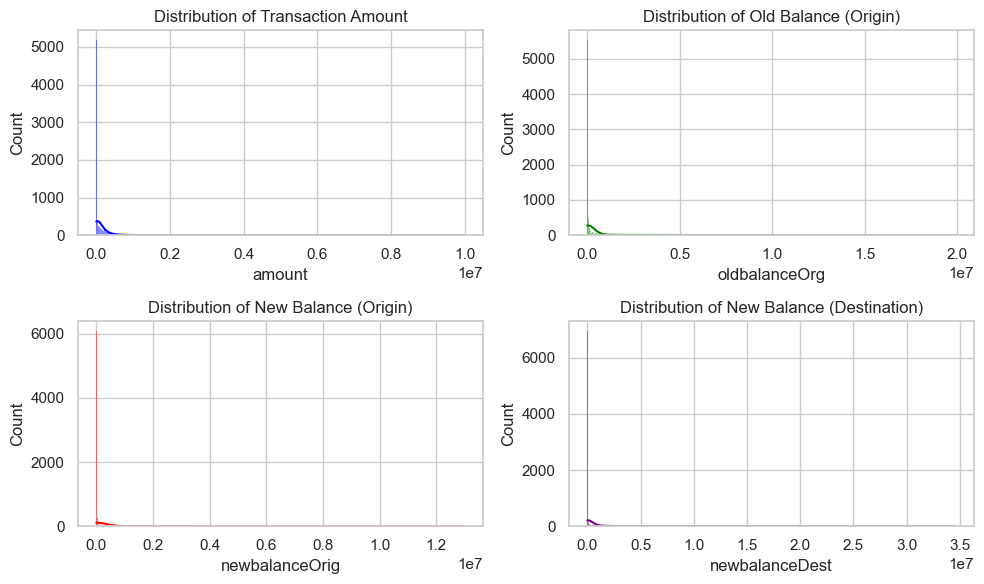

In [48]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Distribution plot for 'amount'
sns.histplot(df['amount'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Transaction Amount')

# Distribution plot for 'oldbalanceOrg'
sns.histplot(df['oldbalanceOrg'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Old Balance (Origin)')

# Distribution plot for 'newbalanceOrig'
sns.histplot(df['newbalanceOrig'], kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of New Balance (Origin)')

# Distribution plot for 'newbalanceDest'
sns.histplot(df['newbalanceDest'], kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of New Balance (Destination)')

plt.tight_layout()
plt.show()

<h3 style="color:#e5e8e8;">Step 4-5: Check Outlier </h3>

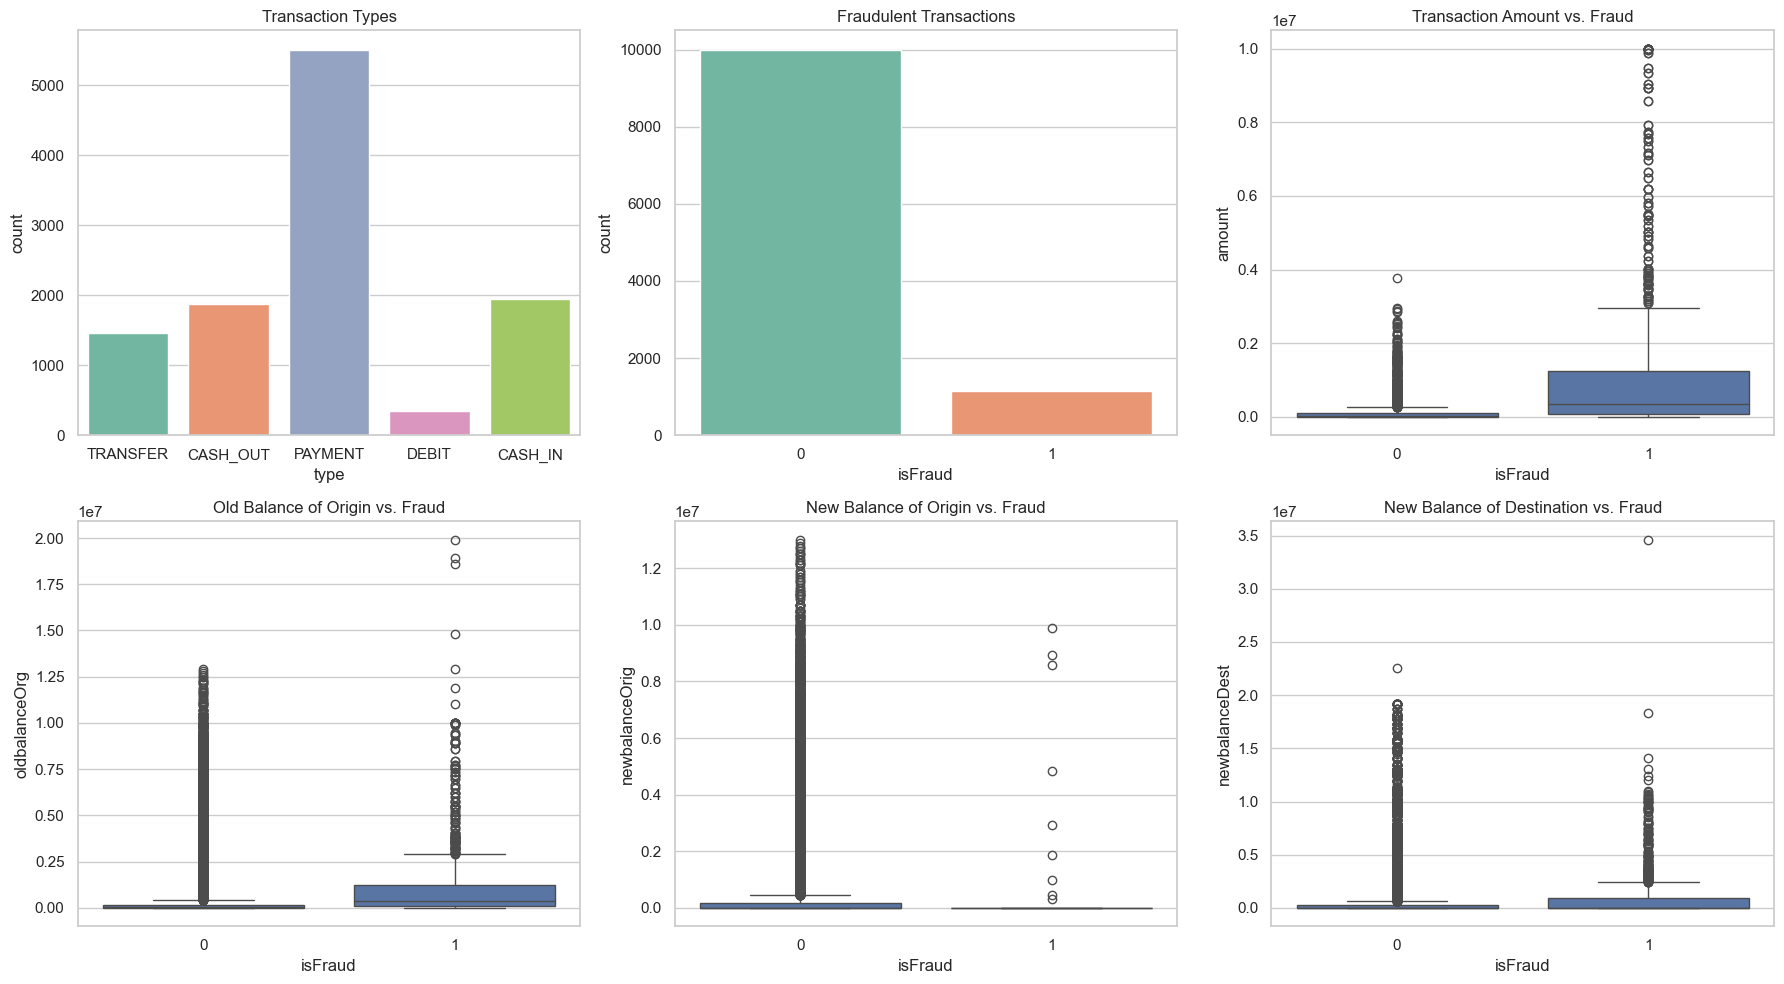

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 
sns.countplot(x='type', data=df, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Transaction Types')

sns.countplot(x='isFraud', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Fraudulent Transactions')

sns.boxplot(x='isFraud', y='amount', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Transaction Amount vs. Fraud')

sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Old Balance of Origin vs. Fraud')

sns.boxplot(x='isFraud', y='newbalanceOrig', data=df, ax=axes[1, 1])
axes[1, 1].set_title('New Balance of Origin vs. Fraud')

sns.boxplot(x='isFraud', y='newbalanceDest', data=df, ax=axes[1, 2])
axes[1, 2].set_title('New Balance of Destination vs. Fraud')

plt.tight_layout()
plt.show()

<h3 style="color:#e5e8e8;">Step 4-6: Remove Outlier</h3>

In [50]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df.reset_index(drop=True, inplace=True)

In [51]:
df.shape

(4623, 10)

# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

In [52]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1
3,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1
4,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1
5,1,TRANSFER,25071.46,C669700766,25071.46,0.0,C1384210339,0.0,0.0,1
6,1,TRANSFER,235238.66,C1872047468,235238.66,0.0,C116289363,0.0,0.0,1
7,2,TRANSFER,14949.84,C140702728,14949.84,0.0,C634210724,0.0,0.0,1
8,2,TRANSFER,18627.02,C1375503918,18627.02,0.0,C234430897,0.0,0.0,1
9,3,TRANSFER,10539.37,C1134864869,10539.37,0.0,C118648358,0.0,0.0,1


<h3 style="color:#e5e8e8;">Step 5-1: Drop irrelevant columns</h3>

In [53]:
df = df.drop(columns=['nameOrig', 'nameDest'])

<h3 style="color:#e5e8e8;">Step 5-2: Label Encoding the 'type' column</h3>

In [54]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

<h3 style="color:#e5e8e8;">Step 5-3: Check the label encoding</h3>

In [55]:
print("Label Encoding:")
print(df['type'].unique())
print(f"'CASH_IN' - 0 'CASH_OUT' - 1'DEBIT' - 2'PAYMENT' - 3'TRANSFER' - 4")

Label Encoding:
[4 1 3 2 0]
'CASH_IN' - 0 'CASH_OUT' - 1'DEBIT' - 2'PAYMENT' - 3'TRANSFER' - 4


<h3 style="color:#e5e8e8;">Step 5-4: Scaling numeric columns</h3>

In [56]:
scaler = StandardScaler()
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

<h3 style="color:#e5e8e8;">Step 5-5: Split the dataset into features (X) and target (y)</h3>

In [57]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

<h3 style="color:#e5e8e8;">Step 5-6: Split the dataset into training and testing sets</h3>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3 style="color:#e5e8e8;">Step 5-7: Check the processed data</h3>

In [59]:
print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)

(3236, 7)
(1387, 7)
(3236,)
(1387,)


(None, None, None, None)

# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 6 | Model Building with Hyper parameter</p>

<h3 style="color:#e5e8e8;">Step 6-1: Logistic Regression</h3>

In [60]:
logreg = LogisticRegression()

# Set up the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

# Perform GridSearchCV
grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best parameters:", grid_logreg.best_params_)
print("Best accuracy:", grid_logreg.best_score_)


Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.9984553590169252


<h3 style="color:#e5e8e8;">Step 6-2: SVC - Support Vector Classifier</h3>

In [61]:
# Define the model
svc = SVC()

# Set up the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf']}

# Perform GridSearchCV
grid_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best parameters:", grid_svc.best_params_)
print("Best accuracy:", grid_svc.best_score_)

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best accuracy: 0.9981457629705955


<h3 style="color:#e5e8e8;">Step 6-3: Random Forest Classifier</h3>

In [62]:
# Define the model
rf = RandomForestClassifier()

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best parameters:", grid_rf.best_params_)
print("Best accuracy:", grid_rf.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy: 0.9987635239567233


<h3 style="color:#e5e8e8;">Step 6-4: Decision Tree Classifier</h3>

In [27]:
# Define the model
dt = DecisionTreeClassifier()

# Set up the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best parameters:", grid_dt.best_params_)
print("Best accuracy:", grid_dt.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy: 1.0


# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 7 | Conclusion</p>

<h3 style="color:#e5e8e8;">Step 7-1: Create Function for Evaluate Model</h3>

In [28]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Check if the model has predict_proba
    if hasattr(model, "predict_proba"):
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        auc = "N/A"  # or you can set it to None if you prefer

    print("--- {model_name} Evaluation ---")
    print("Accuracy: {accuracy:.4f}")
    print("ROC-AUC: {auc if isinstance(auc, str) else auc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score'],
        "AUC-ROC": auc
    }


<h3 style="color:#e5e8e8;">Step 7-2: Use Function and check Report with Confusion Matrix</h3>

--- {model_name} Evaluation ---
Accuracy: {accuracy:.4f}
ROC-AUC: {auc if isinstance(auc, str) else auc:.4f}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1178
           1       1.00      1.00      1.00         7

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185



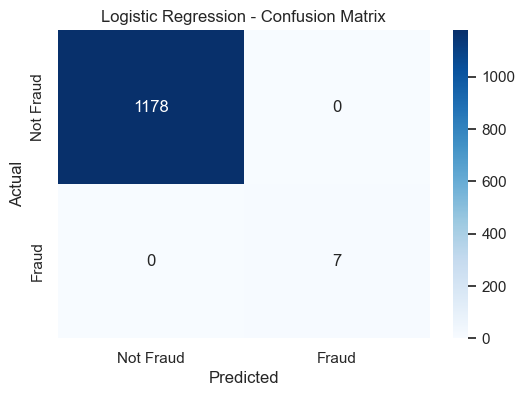

--- {model_name} Evaluation ---
Accuracy: {accuracy:.4f}
ROC-AUC: {auc if isinstance(auc, str) else auc:.4f}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1178
           1       1.00      1.00      1.00         7

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185



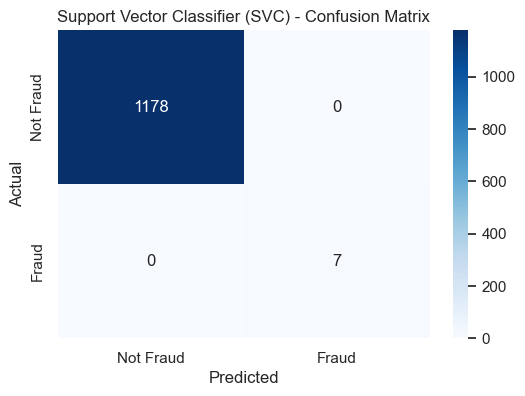

--- {model_name} Evaluation ---
Accuracy: {accuracy:.4f}
ROC-AUC: {auc if isinstance(auc, str) else auc:.4f}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1178
           1       1.00      1.00      1.00         7

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185



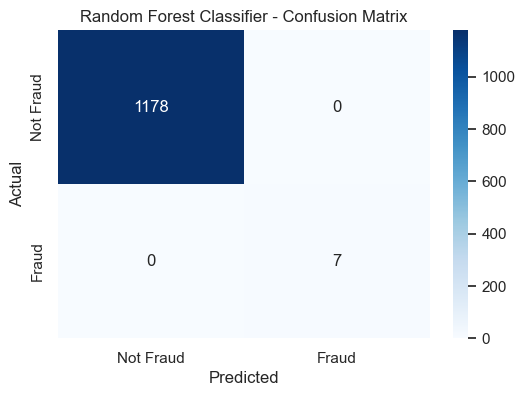

--- {model_name} Evaluation ---
Accuracy: {accuracy:.4f}
ROC-AUC: {auc if isinstance(auc, str) else auc:.4f}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1178
           1       1.00      1.00      1.00         7

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185



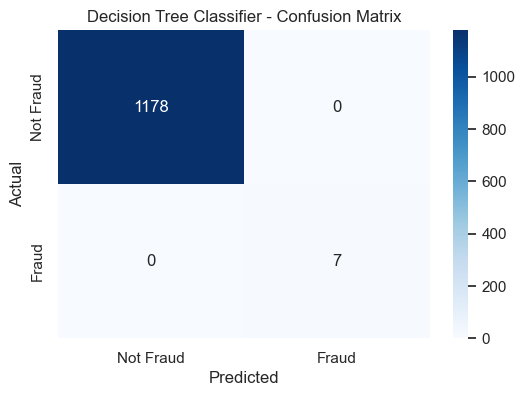

In [29]:
# Initialize a list to store results
results = []

# Evaluate Logistic Regression
logreg_best = grid_logreg.best_estimator_
results.append(evaluate_model(logreg_best, X_test, y_test, "Logistic Regression"))

# Evaluate SVC
svc_best = grid_svc.best_estimator_
results.append(evaluate_model(svc_best, X_test, y_test, "Support Vector Classifier (SVC)"))

# Evaluate Random Forest
rf_best = grid_rf.best_estimator_
results.append(evaluate_model(rf_best, X_test, y_test, "Random Forest Classifier"))

# Evaluate Decision Tree
dt_best = grid_dt.best_estimator_
results.append(evaluate_model(dt_best, X_test, y_test, "Decision Tree Classifier"))

<h3 style="color:#e5e8e8;">Step 7-3: All Model Report</h3>

In [30]:
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
results_df


Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,Support Vector Classifier (SVC),1.0,1.0,1.0,1.0,N/A
2,Random Forest Classifier,1.0,1.0,1.0,1.0,1.0
3,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0


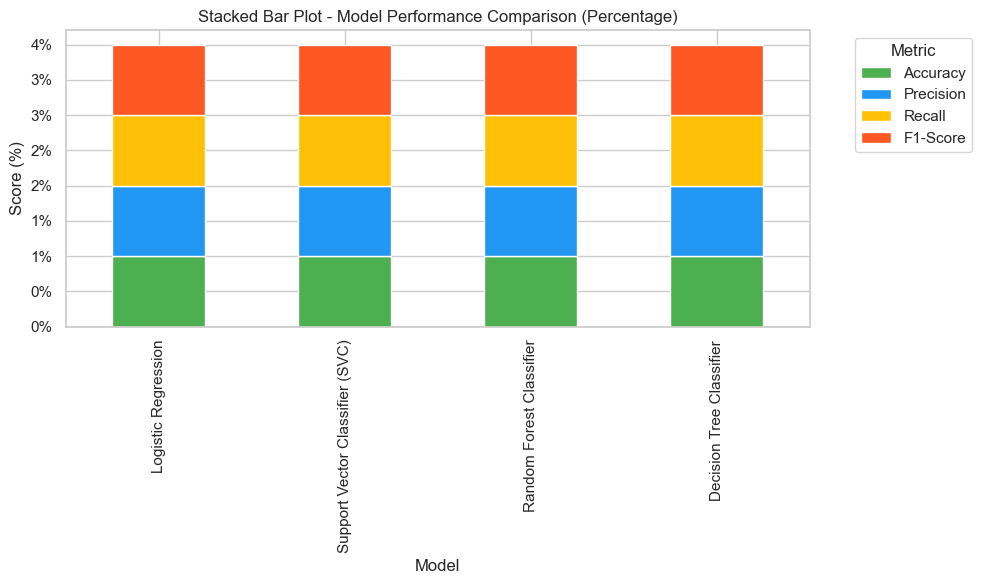

In [31]:
# Plot stacked bar chart
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])

# Customize the plot
plt.title('Stacked Bar Plot - Model Performance Comparison (Percentage)')
plt.ylabel('Score (%)')
plt.xlabel('Model')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Convert y-axis to percentage format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

plt.tight_layout()
plt.show()

<h3 style="color:#e5e8e8;">Step 7-4: Logistic Regression ROC Curve</h3>

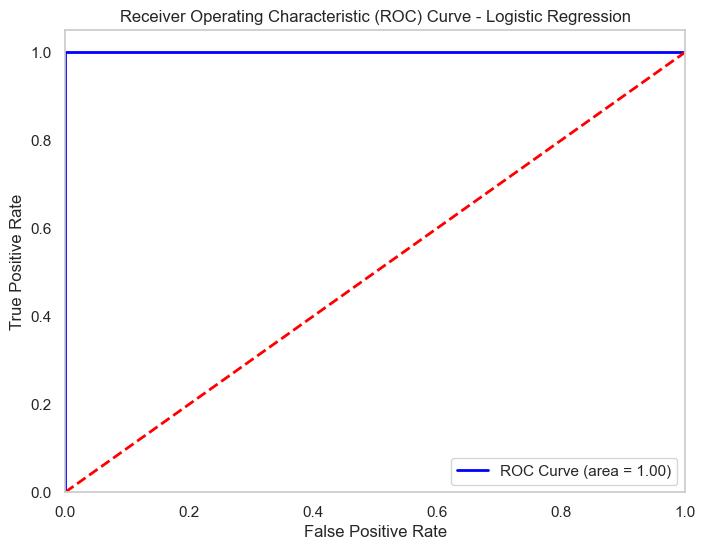

In [32]:
# Use the best estimator from GridSearch
logreg_best = grid_logreg.best_estimator_

# Get predicted probabilities for the positive class
y_pred_proba_logreg = logreg_best.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)

# Compute AUC
roc_auc_logreg = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 8 | Save Model</p>

In [33]:
# Get the best estimator
logreg_best = grid_logreg.best_estimator_

# Save the model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logreg_best, model_file)
    
print("Model saved as 'logistic_regression_model.pkl'")


Model saved as 'logistic_regression_model.pkl'


# <p style="background-color:#5d6d7e; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 9 | Predict</p>

In [34]:
def predict_fraud(input_data):
    # Load the model from the pickle file
    with open('logistic_regression_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    prediction = model.predict(input_data)

    return prediction

In [35]:
sample_data = pd.DataFrame({
    'step': [1],
    'type': [2],
    'amount': [181],
    'oldbalanceOrg': [181],
    'newbalanceOrig': [0],
    'oldbalanceDest': [21182],
    'newbalanceDest': [0]
})
prediction = predict_fraud(sample_data)
print("Prediction:", prediction)

Prediction: [1]


In [72]:
sample_data = pd.DataFrame({
    'step': [1],
    'type': [3],
    'amount': [9839.64],
    'oldbalanceOrg': [170136],
    'newbalanceOrig': [160296.36],
    'oldbalanceDest': [0],
    'newbalanceDest': [0]
})
prediction = predict_fraud(sample_data)
print("Prediction:", prediction)

Prediction: [0]
